In [7]:
!pip install numpy==1.17.1 matplotlib==3.1.1 pandas==0.25.1 python-dateutil==2.6.1 imgaug==0.2.5

1.- Cree un programa que genere un DataFrame que contenga la cantidad de registros por REGION, luego muéstrelo.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url='https://raw.githubusercontent.com/csuarez689/IATP4/master/ENFR2013.txt'
data=pd.read_csv(url,sep='|',usecols=['REGION'])
print(data.groupby('REGION').size().reset_index(name='Cantidad'))

   REGION  Cantidad
0       1      2862
1       2      9618
2       3      6584
3       4      4014
4       5      3339
5       6      5948


2.- Muestre en un gráfico cuanto es el porcentaje de cada tipo de vivienda en el aglomerado del Gran Córdoba.

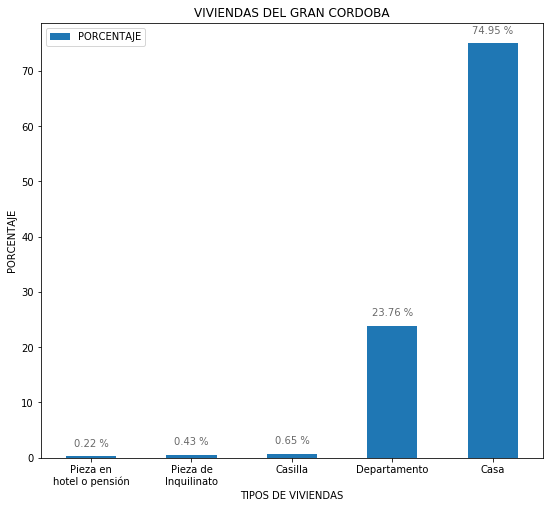

In [9]:
data=pd.read_csv(url,sep='|',usecols=['AGLOMERADO','BHCV01'])
data=data[data.AGLOMERADO==2]
total=len(data)
data.BHCV01.replace({1:'Casa',2:'Casilla',3:'Departamento',4:'Pieza de\nInquilinato',5:'Pieza en\nhotel o pensión',6:'Local no\nconstruido\npara habitación',7:'Otros'},inplace=True)

data=data.groupby('BHCV01').size().reset_index(name='PORCENTAJE')
data.PORCENTAJE=data.PORCENTAJE.apply(lambda x: (x/total)*100)
data.sort_values(['PORCENTAJE'],ascending=[True],inplace=True)
data=data.reset_index(drop=True)
graph=data.plot.bar('BHCV01','PORCENTAJE',rot=0,figsize=(9,8))
for i, bar in enumerate(graph.patches):
    graph.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1.5,
            f"{data.PORCENTAJE[i]:.2f} %",
            horizontalalignment= 'center', verticalalignment='bottom',
            fontsize=10, color='dimgrey')
plt.title("VIVIENDAS DEL GRAN CORDOBA")
plt.xlabel('TIPOS DE VIVIENDAS')
plt.ylabel('PORCENTAJE')
graph.legend()
plt.show()


3.- Muestre por pantalla cuanto es el porcentaje de viviendas que tienen baño o letrina en el Chaco

In [10]:
data=pd.read_csv(url,sep='|',usecols=['BHCV09','COD_PROVINCIA'])
data=data[data.COD_PROVINCIA==22]
total=len(data)
data=data[data.BHCV09==1]
print(f"Porcentaje de viviendas con baño o letrina en Chaco: {(len(data.BHCV09)/total)*100 :.2f}%")

Porcentaje de viviendas con baño o letrina en Chaco: 99.55%


4.- Analice el ítem “Jefe de Hogar”. Cuanto es el porcentaje según género rango de edad para todo el país?
Que sucede en Bs.As.? y en San Luis?
Muestre el gráfico que considere que refleja mejor la comparación.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  This is separate from the ipykernel package so we can avoid doing imports until


País: 
      SEXO         EDADES  PORCENTAJE
0   Varón    0 a 17 años    0.009269
1   Mujer    0 a 17 años    0.003090
2   Varón   18 a 24 años    2.230805
3   Mujer   18 a 24 años    1.649930
4   Varón   25 a 34 años   11.129306
5   Mujer   25 a 34 años    4.857099
6   Varón   35 a 49 años   21.350224
7   Mujer   35 a 49 años    9.748185
8   Varón   50 a 64 años   18.214120
9   Mujer   50 a 64 años    9.893403
10  Varón  65 años y más   11.073691
11  Mujer  65 años y más    9.840877


Buenos Aires: 
      SEXO         EDADES  PORCENTAJE
0   Varón    0 a 17 años    0.000000
1   Mujer    0 a 17 años    0.000000
2   Varón   18 a 24 años    2.310358
3   Mujer   18 a 24 años    1.597998
4   Varón   25 a 34 años   10.993454
5   Mujer   25 a 34 años    4.543704
6   Varón   35 a 49 años   20.600693
7   Mujer   35 a 49 años    9.106662
8   Varón   50 a 64 años   17.654987
9   Mujer   50 a 64 años    9.799769
10  Varón  65 años y más   12.572199
11  Mujer  65 años y más   10.820177


San Luis: 

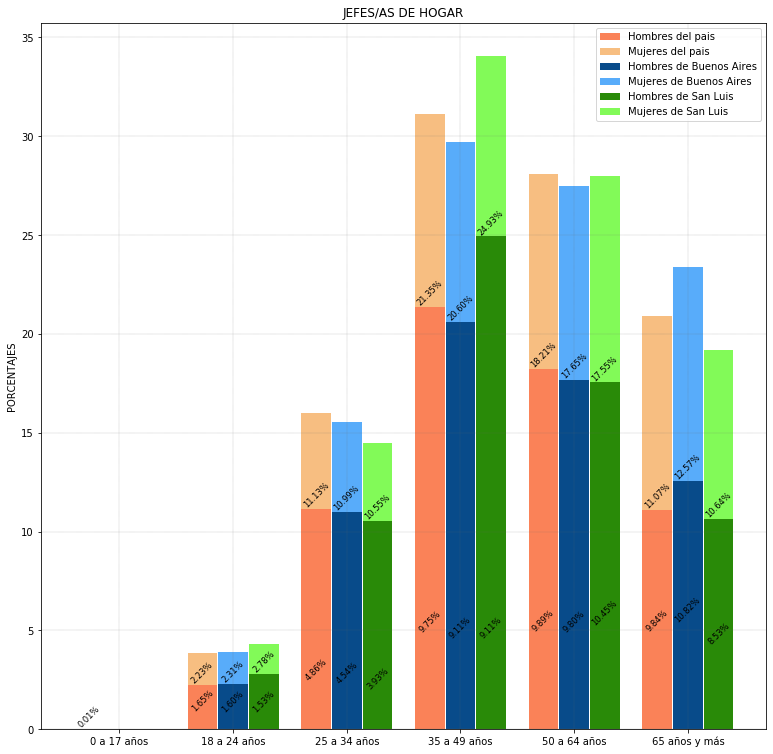

In [11]:
def filterData(data,formatData):
    total=len(data)
    data=data.groupby(('BHCH04_J','RANGO_EDAD_J')).size().reset_index(name='PORCENTAJE')
    data = pd.merge(data, formatData,  how='right', left_on=['BHCH04_J','RANGO_EDAD_J'], right_on = ['BHCH04_J','RANGO_EDAD_J'])
    data.rename(columns={'BHCH04_J':'SEXO','RANGO_EDAD_J':'EDADES'},inplace=True)
    data.fillna(0, inplace=True)
    data.sort_values('EDADES', ascending=[True], inplace=True)
    data=data.reset_index(drop=True)
    data.PORCENTAJE=data.PORCENTAJE.apply(lambda x: (x/total)*100)
    data.SEXO.replace({1:'Varón',2:'Mujer'},inplace=True)
    data.EDADES.replace({1:'0 a 17 años',2:'18 a 24 años',3:'25 a 34 años',4:'35 a 49 años',5:'50 a 64 años',6:'65 años y más'},inplace=True)
    return data



dataPais=pd.read_csv(url,sep='|',usecols=['BHCH04_J','RANGO_EDAD_J','COD_PROVINCIA'])
formatData=pd.DataFrame({'BHCH04_J':([1]*6)+([2]*6),'RANGO_EDAD_J':[1,2,3,4,5,6]*2})
dataSanLuis=dataPais[dataPais.COD_PROVINCIA==74]
dataBaires=dataPais[dataPais.COD_PROVINCIA==6]
dataPais=filterData(dataPais,formatData)
dataBaires=filterData(dataBaires,formatData)
dataSanLuis=filterData(dataSanLuis,formatData)
print("País: \n",dataPais)
print("\n\nBuenos Aires: \n", dataBaires)
print("\n\nSan Luis: \n", dataSanLuis)

#graph config
fig, ax = plt.subplots(figsize=(13,13))
firstPosition= np.arange(len(dataPais.EDADES.unique()))
barWidth = 0.26
sep=0.01
lineWidth=1
hombresPais=dataPais[dataPais.SEXO=='Varón'].PORCENTAJE
hombresBaires=dataBaires[dataBaires.SEXO=='Varón'].PORCENTAJE
hombresSanLuis=dataSanLuis[dataSanLuis.SEXO=='Varón'].PORCENTAJE
def autolabel(bars):
       for bar in bars:
        height = bar.get_height()
        pos= -height*10 if bar.get_y()>1 else -bar.get_y()*3
        if(round(height,2)>.00):
            ax.annotate('{:.2f}%'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0,pos), 
                        textcoords="offset points",
                        ha='center', va='bottom',rotation=45, color='black',size='small')

paisMansBars= plt.bar(firstPosition-barWidth-sep, hombresPais, barWidth, label='Hombres del pais', color='#FA8258',)
paisWomansBars= plt.bar(firstPosition-barWidth-sep, dataPais[dataPais.SEXO=='Mujer'].PORCENTAJE, barWidth, label='Mujeres del pais', color='#F7BE81', bottom=hombresPais)
bairesMansBars= plt.bar(firstPosition, hombresBaires, barWidth, label='Hombres de Buenos Aires', color='#084B8A')
bairesWomansBars= plt.bar(firstPosition, dataBaires[dataBaires.SEXO=='Mujer'].PORCENTAJE, barWidth, label='Mujeres de Buenos Aires', color='#58ACFA', bottom=hombresBaires)
sanLuisMansBars= plt.bar(firstPosition+barWidth+sep, hombresSanLuis, barWidth, label='Hombres de San Luis', color='#298A08')
sanLuisWomansBars= plt.bar(firstPosition+barWidth+sep, dataSanLuis[dataSanLuis.SEXO=='Mujer'].PORCENTAJE, barWidth, label='Mujeres de San Luis', color='#82FA58',bottom=hombresSanLuis)

autolabel(paisMansBars)
autolabel(paisWomansBars)
autolabel(bairesMansBars)
autolabel(bairesWomansBars)
autolabel(sanLuisMansBars)
autolabel(sanLuisWomansBars)

plt.ylabel('PORCENTAJES')
plt.title('JEFES/AS DE HOGAR')
plt.xticks(firstPosition, dataPais.EDADES.unique())
plt.legend()
plt.grid(color='dimgray',linestyle='--', linewidth=0.2)
plt.show()

5.- Muestre un histograma con la distribución de los rangos de edad para los Jefes de hogar y otro para las Jefas de hogar 

          EDADES  FRECUENCIA ABSOLUTA
0    0 a 17 años                    3
1   18 a 24 años                  722
2   25 a 34 años                 3602
3   35 a 49 años                 6910
4   50 a 64 años                 5895
5  65 años y más                 3584
          EDADES  FRECUENCIA ABSOLUTA
0    0 a 17 años                    1
1   18 a 24 años                  534
2   25 a 34 años                 1572
3   35 a 49 años                 3155
4   50 a 64 años                 3202
5  65 años y más                 3185


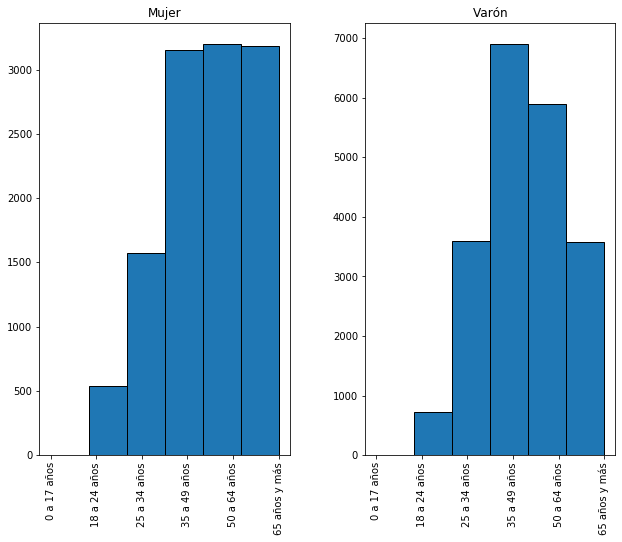

In [12]:
dataPais=pd.read_csv(url,sep='|',usecols=['RANGO_EDAD_J','BHCH04_J'])
dataPais.rename(columns={'BHCH04_J':'SEXO','RANGO_EDAD_J':'EDADES'},inplace=True)
dataPais.EDADES.replace({1:'0 a 17 años',2:'18 a 24 años',3:'25 a 34 años',4:'35 a 49 años',5:'50 a 64 años',6:'65 años y más'},inplace=True)
dataPais.SEXO.replace({1:'Varón',2:'Mujer'},inplace=True)
dataPais.sort_values('EDADES', ascending=[True], inplace=True)
dataPaisHombres=dataPais[dataPais.SEXO=='Varón']
dataPaisMujeres=dataPais[dataPais.SEXO=='Mujer']
dataPaisHombres=dataPaisHombres.groupby('EDADES').size().reset_index(name='FRECUENCIA ABSOLUTA')
dataPaisMujeres=dataPaisMujeres.groupby('EDADES').size().reset_index(name='FRECUENCIA ABSOLUTA')
print(dataPaisHombres)
print(dataPaisMujeres)

barras=len(dataPais.EDADES.unique())
dataPais.hist(bins=barras,by='SEXO',column='EDADES',figsize=(10,8),edgecolor='black',grid=True,layout=(1,2))
plt.show()